In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [ ]:
%pip install yellowbrick

# 3.1 Read the data file

In [3]:
wine = pd.read_csv("wine.csv")
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 3.2 Inspect the data

In [4]:
wine.head(20)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
wine.drop(['Malic_Acid',"Ash", "Ash_Alcanity", "Nonflavanoid_Phenols", "Proanthocyanins", "Hue", "OD280", "Proline"],axis =1, inplace = True)

<AxesSubplot:>

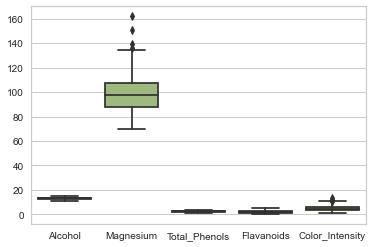

In [8]:
sns.boxplot(data= wine)

In [9]:
wine = stats.zscore(wine)

<AxesSubplot:>

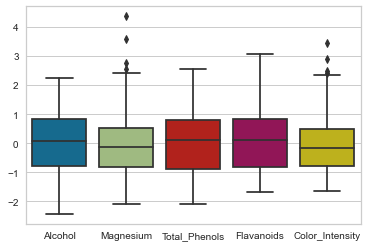

In [10]:
sns.boxplot(data= wine)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

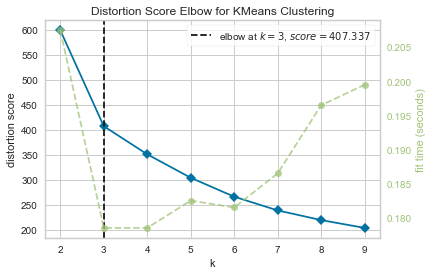

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=77), k=(2, 10))

In [11]:
kelbow_visualizer(KMeans(random_state=77), wine, k=(2,10))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

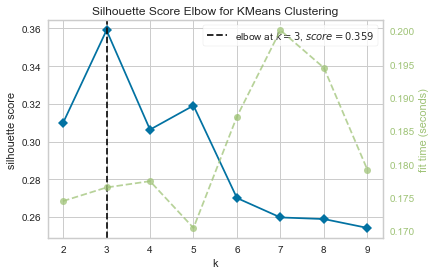

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=9, random_state=77), k=(2, 10),
                 metric='silhouette')

In [21]:
kelbow_visualizer(KMeans(random_state=77),wine,metric = "silhouette", k=(2,10))

In [12]:
model = KMeans(n_clusters = 3, random_state = 77)
model.fit(wine)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=77)

In [13]:
y = model.labels_
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [14]:
centroids  = model.cluster_centers_ 
centroids

array([[ 0.19919515, -0.01403609, -0.96625243, -1.23310004,  1.02854044],
       [-0.88030783, -0.46011976, -0.1953626 , -0.06270582, -0.88399878],
       [ 0.83901431,  0.53150813,  0.98131371,  1.04123776,  0.19058975]])

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Magnesium        178 non-null    float64
 2   Total_Phenols    178 non-null    float64
 3   Flavanoids       178 non-null    float64
 4   Color_Intensity  178 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


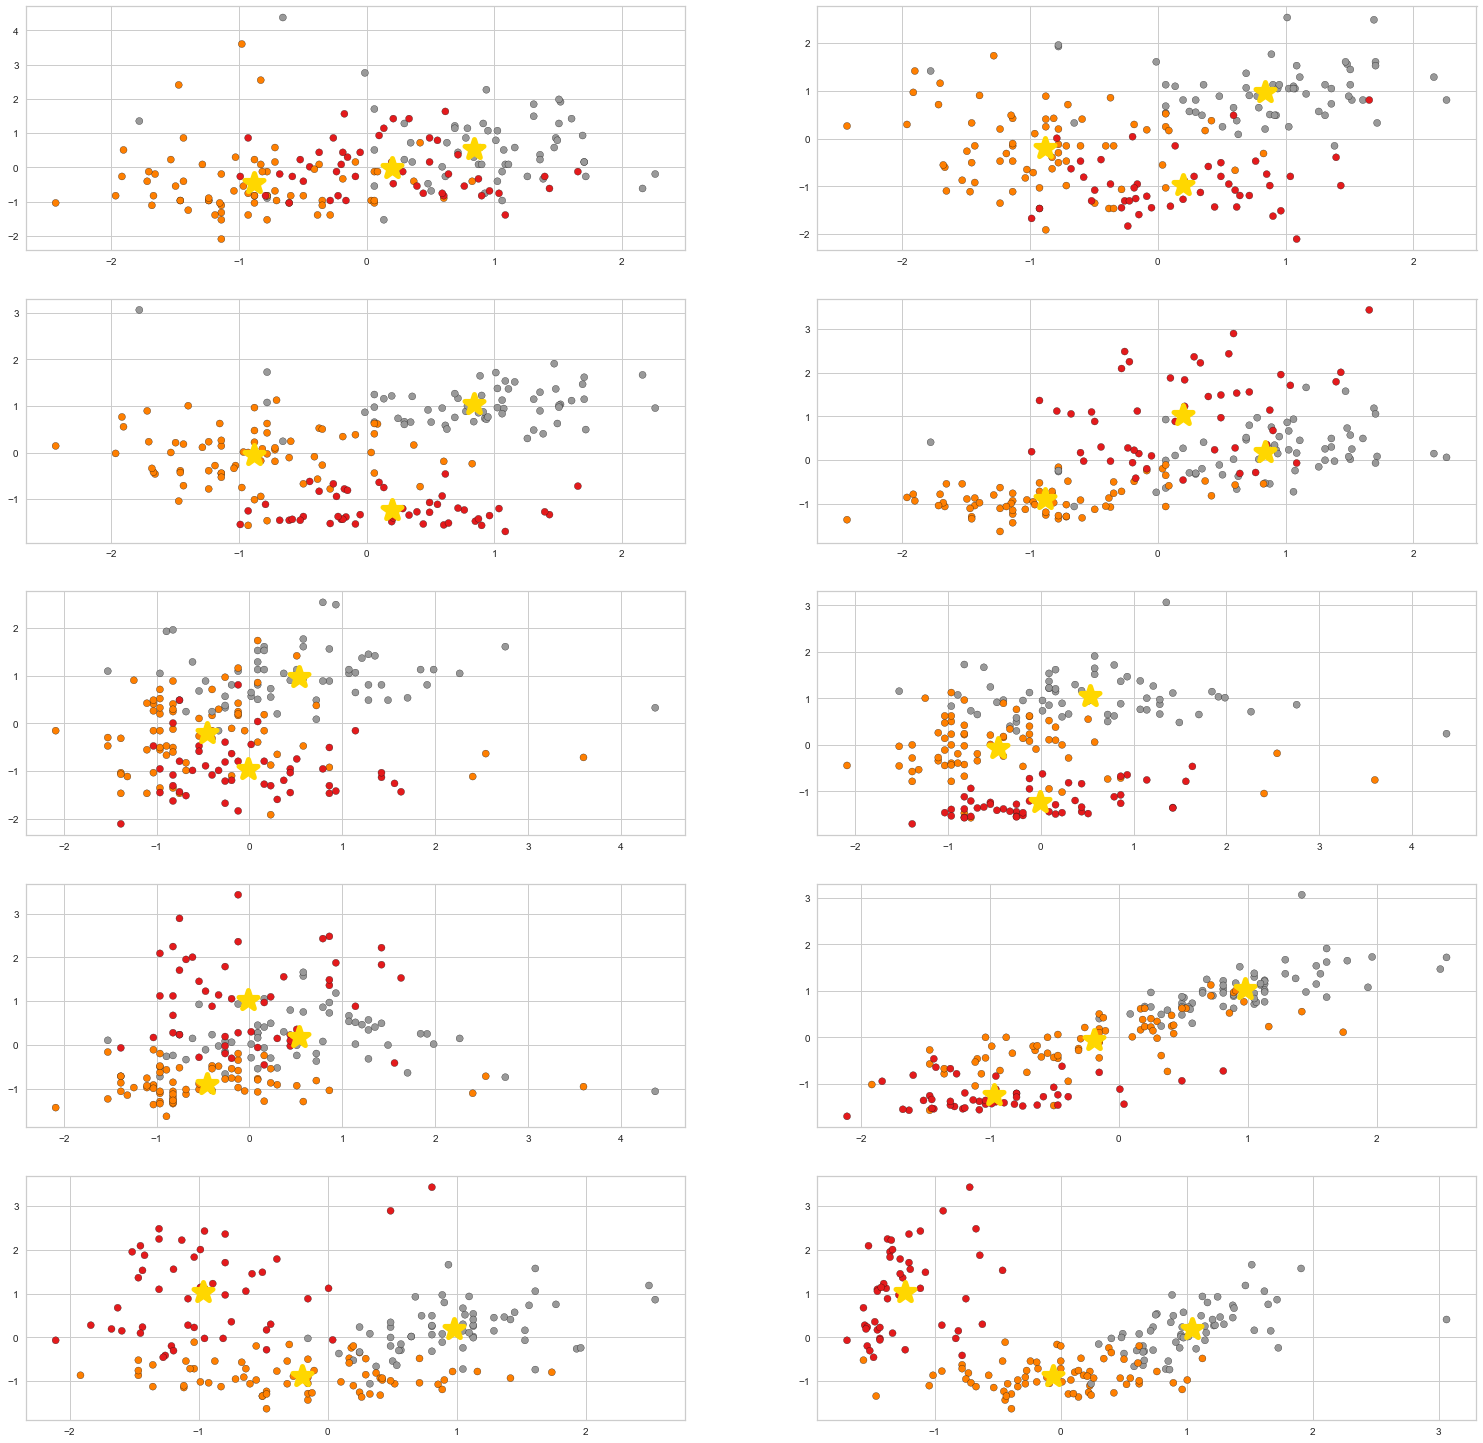

In [16]:
f, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (26, 26))

axes[0,0].scatter(wine["Alcohol"],wine["Magnesium"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[0,0].scatter(centroids[:,0], centroids[:,1],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[0,1].scatter(wine["Alcohol"],wine["Total_Phenols"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[0,1].scatter(centroids[:,0], centroids[:,2],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[1,0].scatter(wine["Alcohol"],wine["Flavanoids"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[1,0].scatter(centroids[:,0], centroids[:,3],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[1,1].scatter(wine["Alcohol"],wine["Color_Intensity"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[1,1].scatter(centroids[:,0], centroids[:,4],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[2,0].scatter(wine["Magnesium"],wine["Total_Phenols"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[2,0].scatter(centroids[:,1], centroids[:,2],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[2,1].scatter(wine["Magnesium"],wine["Flavanoids"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[2,1].scatter(centroids[:,1], centroids[:,3],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[3,0].scatter(wine["Magnesium"],wine["Color_Intensity"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[3,0].scatter(centroids[:,1], centroids[:,4],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[3,1].scatter(wine["Total_Phenols"],wine["Flavanoids"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[3,1].scatter(centroids[:,2], centroids[:,3],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[4,0].scatter(wine["Total_Phenols"],wine["Color_Intensity"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[4,0].scatter(centroids[:,2], centroids[:,4],  marker = "*", c = "Gold", s=400, linewidths = 5)

axes[4,1].scatter(wine["Flavanoids"],wine["Color_Intensity"], c = y , cmap = plt.cm.Set1, edgecolor = 'k')
axes[4,1].scatter(centroids[:,3], centroids[:,4],  marker = "*", c = "Gold", s=400, linewidths = 5)



In [22]:
print("The plots and the elbow curve and silhouette analysis seem to agree \nthat the optimal k-value is 3 because there does seeem to be 3 clusters \nalbeit clearer in some graphs than others")

The plots and the elbow curve and silhouette analysis seem to agree 
that the optimal k-value is 3 because there does seeem to be 3 clusters 
albeit clearer in some graphs than others
